In [1]:
 import matplotlib.pyplot as plt
 import util
 import trainAgg
 import data_factory

 # This is just the entire dataset, we will be exposed to train images her
 
 this_dataset = data_factory.dataset_hennepin('test','/u/eag-d1/data/Hennepin/ver8/',
    '/u/eag-d1/data/Hennepin/ver8/hennepin_bbox.csv',
    '/u/eag-d1/data/Hennepin/hennepin_county_parcels/hennepin_county_parcels.shp')

Reading GeoDataFrame...
Done
Generating list of useful chips
100%|██████████| 5170/5170 [00:04<00:00, 1041.05it/s]


In [2]:
model = trainAgg.End2EndAggregationModule(use_pretrained=False)
model = model.load_from_checkpoint('/u/pop-d1/grad/cgar222/Projects/disaggregation/aggregation/lightning_logs/version_155/checkpoints/epoch=160-step=67297.ckpt', use_pretrained=False)

In [3]:
import torch
with torch.no_grad():
        for sample in this_dataset:
            image = sample['image']
            polygons = sample['polygons']
            img_bbox = sample['img_bbox']

            x = model.get_valOut(torch.unsqueeze(image,0))

            break

torch.Size([3, 256, 256])
torch.Size([1, 1, 256, 256])


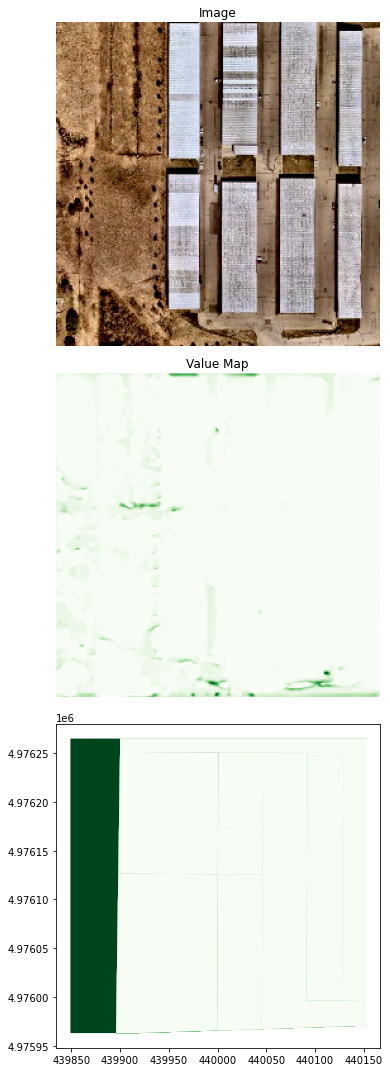

In [5]:
import numpy as np

fig, axs = plt.subplots(3,1,figsize=(10,15))
print(image.shape)
axs[0].imshow(image.permute(1,2,0))
axs[0].axis('off')
axs[0].set_title("Image")
#axs[1].imshow(seg_grid.permute(1,2,0))
#axs[1].axis('off')
print(x.shape)
axs[1].imshow(x.squeeze(0).permute(1,2,0), vmin = 0.0, cmap = 'Greens')
axs[1].axis('off')
axs[1].set_title("Value Map")

# This needs proper color scalings... unsure how to do this
polygons.plot(ax=axs[2], column = 'TOTAL_MV1', alpha = 1, linewidth=3, cmap = 'Greens')

# I need to take this and make a script to generate them...

fig.tight_layout()
plt.savefig('/u/pop-d1/grad/cgar222/Projects/disaggregation/Plots/Single.jpg')